In [1]:
# Import necessary libraries and packages
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
import cv2
from pandas.plotting import table 
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import (erosion, dilation, closing, opening)

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# **ACTIVITY 7: FEATURE EXTRACTION FROM LABELED BLOBS**

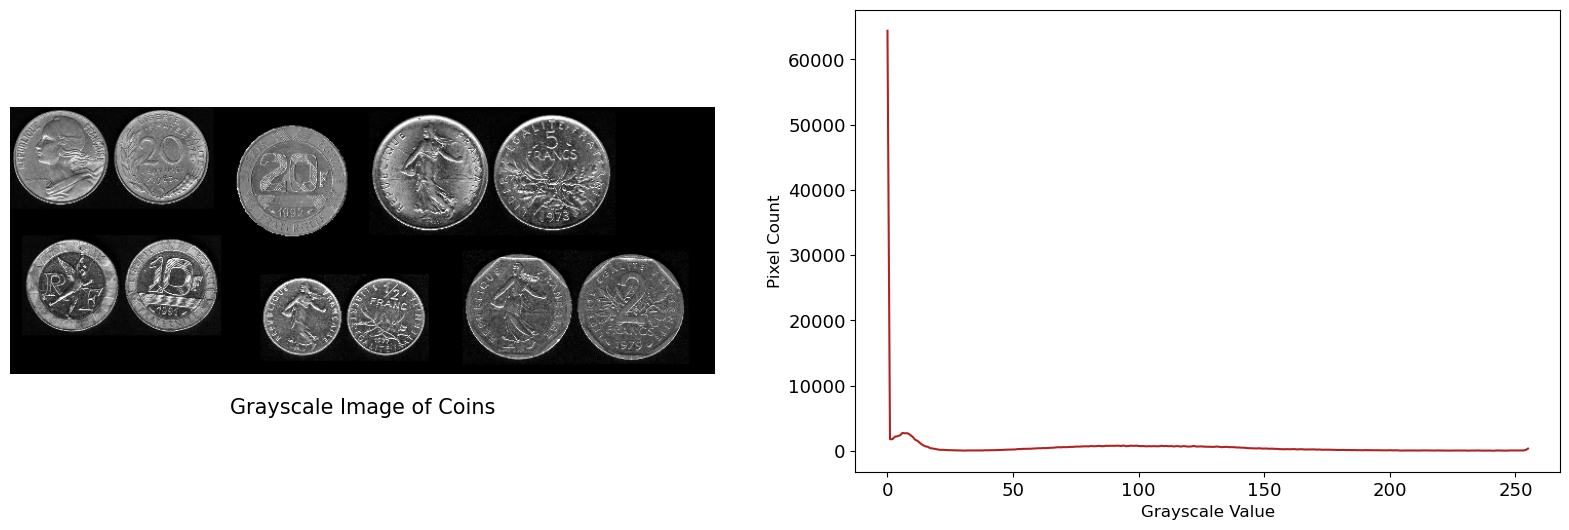

In [3]:
# Load in the image
img = Image.open('/Users/Amogus/Downloads/coin.png')
img_arr = np.array(img)
# Convert to grayscale
img_gray = img.convert('L')

# Grayscale values array
vals = np.arange(0,256,1)
# Solve for the histogram of the grayscale image
hist = img_gray.histogram()

# Juxtapose the image with its histogram
plt.figure(figsize=(20,6))
# First subplot for image
plt.subplot(121)
plt.axis('off')
plt.title('Grayscale Image of Coins', y=-0.18, fontsize=15)
plt.imshow(img, cmap='gray')
# Second subplot for histogram
plt.subplot(122)
plt.plot(vals, hist, color='firebrick')
plt.xlabel('Grayscale Value', fontsize=12)
plt.ylabel('Pixel Count', fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/coins_gs_hist.png', dpi = 300, bbox_inches='tight')
plt.show()

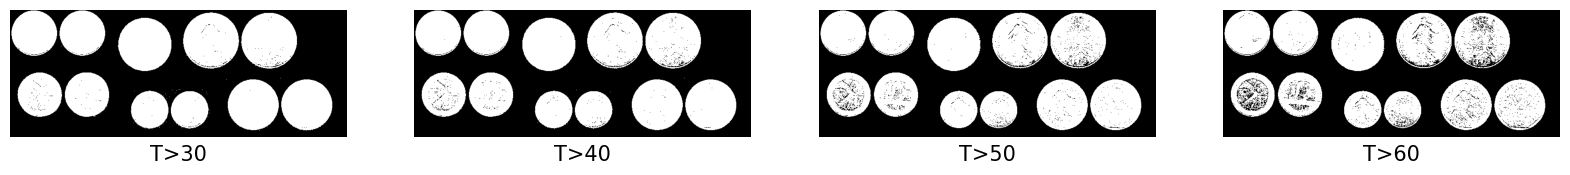

In [4]:
# Perform image thresholding
I1 = img_arr>30
I2 = img_arr>40
I3 = img_arr>50
I4 = img_arr>60
# Plot parameters
plt.figure(figsize=(20,6))
plt.subplot(141)
plt.axis('off')
plt.title('T>30', y=-0.25, fontsize=15)
plt.imshow(I1, cmap='gray')
plt.subplot(142)
plt.axis('off')
plt.title('T>40', y=-0.25, fontsize=15)
plt.imshow(I2, cmap='gray')
plt.subplot(143)
plt.axis('off')
plt.title('T>50', y=-0.25, fontsize=15)
plt.imshow(I3, cmap='gray')
plt.subplot(144)
plt.axis('off')
plt.title('T>60', y=-0.25, fontsize=15)
plt.imshow(I4, cmap='gray')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/coins_thresholding.png', dpi = 300, bbox_inches='tight')
plt.show()

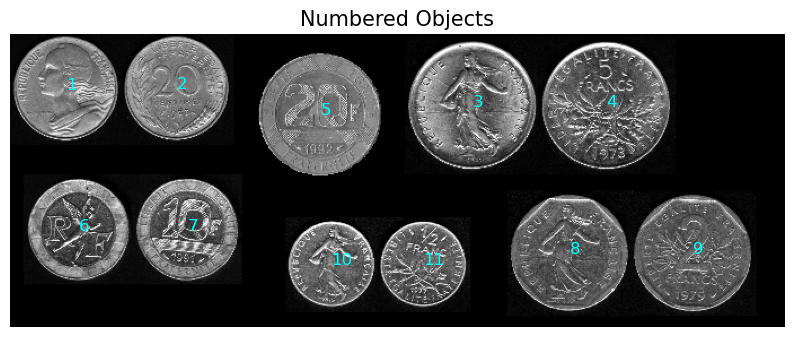

In [5]:
# Create structuring element
element = np.array([[0,0,0,0,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,0,0,0,0]])

# Perform morphological operations on the thresholded image
# Closing followed by opening
morph = opening(closing(I1, element), element)
# Label the image
labeled_image = label(morph)
# Plot the original image with the numbered objects
plt.figure(figsize=(10, 8))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Numbered Objects', fontsize=15)

# Add numbers and affix them to the centroid of each object
for region in regionprops(labeled_image):
    y, x = region.centroid
    plt.text(x, y, region.label, color='cyan', fontsize=12)
    
plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/coins_numbered.png', dpi = 300, bbox_inches='tight')
plt.show()

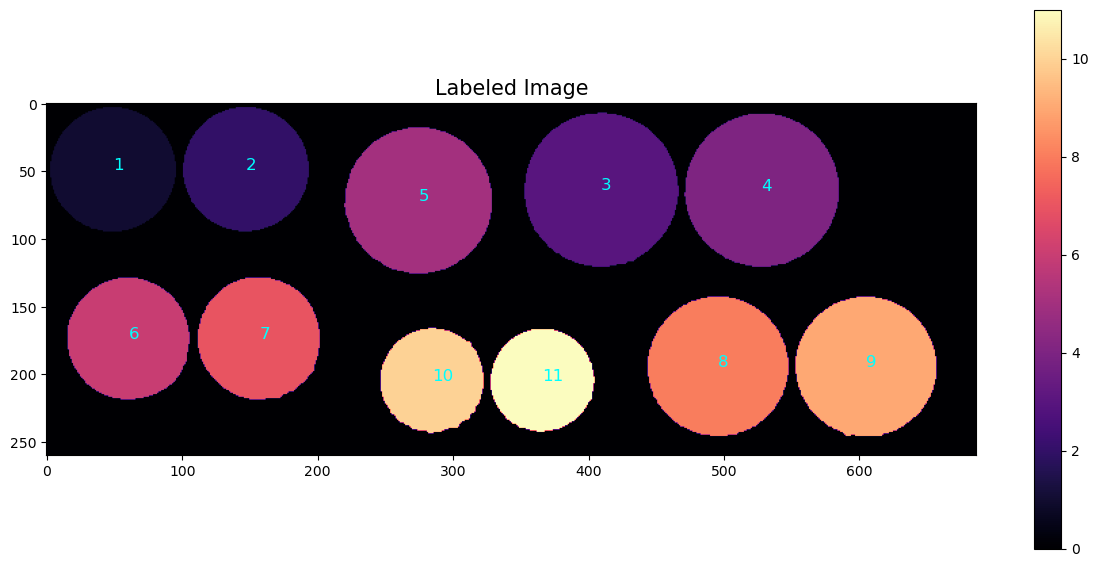

In [6]:
# Label the morphologically operated image
labeled_image = label(morph)

# Display the labeled image
plt.figure(figsize=(15, 7))
plt.imshow(labeled_image, cmap='magma')
plt.colorbar()
plt.title('Labeled Image', fontsize=15)

# Add numbers and affix them to the centroid of each object
for region in regionprops(labeled_image):
    y, x = region.centroid
    plt.text(x, y, region.label, color='cyan', fontsize=12)

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/coins_labeled.png', dpi = 300, bbox_inches='tight')
plt.show()

In [7]:
 # Display the properties of the labeled image as a dataframe
df = pd.DataFrame(regionprops_table(labeled_image, properties=['perimeter','area','eccentricity','bbox']))
df.index = np.arange(1, len(df)+1)

# Export as csv
df.to_csv('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/coins.csv')
df.style.set_table_attributes("style='display:inline'").set_caption('Blob Features')

,perimeter,area,eccentricity,bbox-0,bbox-1,bbox-2,bbox-3
1,302.735065,6698,0.127756,3,3,95,96
2,302.735065,6689,0.139908,3,101,95,194
3,374.090404,10134,0.068599,7,353,121,467
4,373.261977,10103,0.106894,8,471,121,585
5,356.190909,9221,0.100809,18,220,126,329
6,296.835570,6397,0.156156,129,16,219,106
7,296.249783,6434,0.170651,129,112,219,202
8,339.705627,8408,0.118571,143,444,246,548
9,341.119841,8441,0.118493,143,553,246,657
10,255.965512,4621,0.121430,166,247,244,323


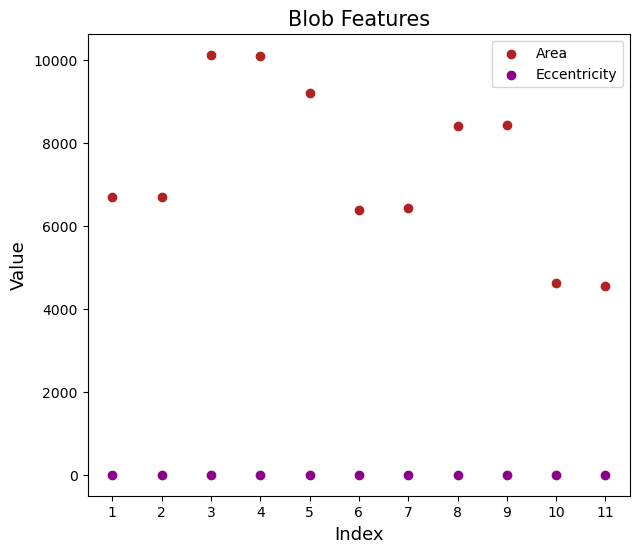

In [8]:
# Construct a scatter plot for the properties we extracted from the blobs
plt.figure(figsize=(7,6))
# Scatter plot for area
plt.scatter(df.index, df['area'], color='firebrick', label='Area')
# Scatter plot for eccentricity
plt.scatter(df.index, df['eccentricity'], color = 'darkmagenta', label='Eccentricity')
plt.title('Blob Features', fontsize=15)
plt.xlabel('Index', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.xticks(np.arange(1,12,1))
plt.legend()

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/coins_feature_scatter.png', dpi = 300, bbox_inches='tight')
plt.show()

# **Feature extraction on other images**

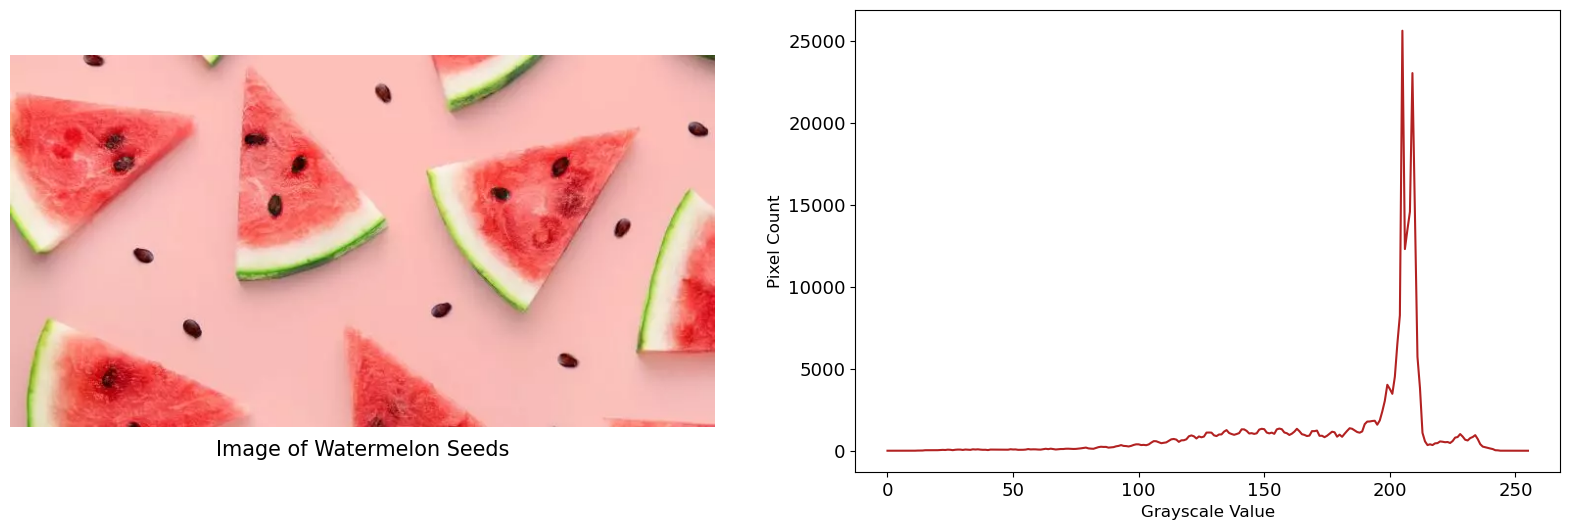

In [9]:
# Define function that converts rgb image to grayscale
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
# Load in the image
img = Image.open('/Users/Amogus/Downloads/watermelon1.png')
img_arr = np.array(img)
img_arr_gray = rgb2gray(img_arr)
# Convert to grayscale
img_gray = img.convert('L')

# Grayscale values array
vals = np.arange(0,256,1)
# Solve for the histogram of the grayscale image
hist = img_gray.histogram()

# Juxtapose the image with its histogram
plt.figure(figsize=(20,6))
# First subplot for image
plt.subplot(121)
plt.axis('off')
plt.title('Image of Watermelon Seeds', y=-0.10, fontsize=15)
plt.imshow(img)
# Second subplot for histogram
plt.subplot(122)
plt.plot(vals, hist, color='firebrick')
plt.xlabel('Grayscale Value', fontsize=12)
plt.ylabel('Pixel Count', fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/watermelon_gs_hist.png', dpi = 300, bbox_inches='tight')
plt.show()

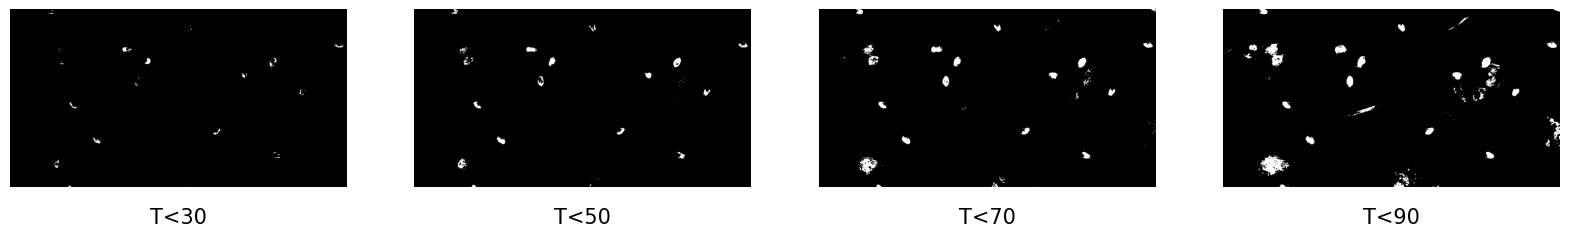

In [10]:
# Perform image thresholding
I1 = img_arr_gray<30
I2 = img_arr_gray<50
I3 = img_arr_gray<70
I4 = img_arr_gray<90
# Plot parameters
plt.figure(figsize=(20,6))
plt.subplot(141)
plt.axis('off')
plt.title('T<30', y=-0.25, fontsize=15)
plt.imshow(I1, cmap='gray')
plt.subplot(142)
plt.axis('off')
plt.title('T<50', y=-0.25, fontsize=15)
plt.imshow(I2, cmap='gray')
plt.subplot(143)
plt.axis('off')
plt.title('T<70', y=-0.25, fontsize=15)
plt.imshow(I3, cmap='gray')
plt.subplot(144)
plt.axis('off')
plt.title('T<90', y=-0.25, fontsize=15)
plt.imshow(I4, cmap='gray')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/watermelon_thresholding.png', dpi = 300, bbox_inches='tight')
plt.show()

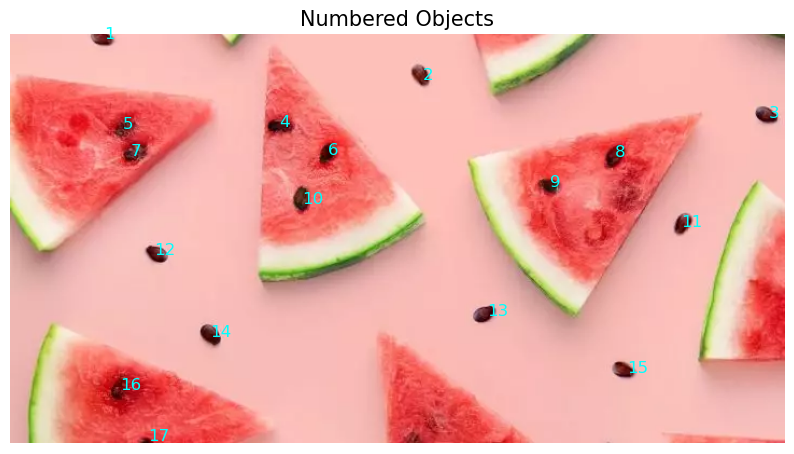

In [11]:
# Create structuring element
element = np.array([[0,0,0,1,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [1,1,1,1,1,1,1],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,1,0,0,0]])

# Perform morphological operations on the thresholded image
# Closing followed by opening
morph = opening(closing(I2, element), element)
# Label the image
labeled_image = label(morph)
# Plot the original image with the numbered objects
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Numbered Objects', fontsize=15)

# Add numbers and affix them to the centroid of each object
for region in regionprops(labeled_image):
    y, x = region.centroid
    plt.text(x, y, region.label, color='cyan', fontsize=12)
    
plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/watermelon_numbered.png', dpi = 300, bbox_inches='tight')
plt.show()

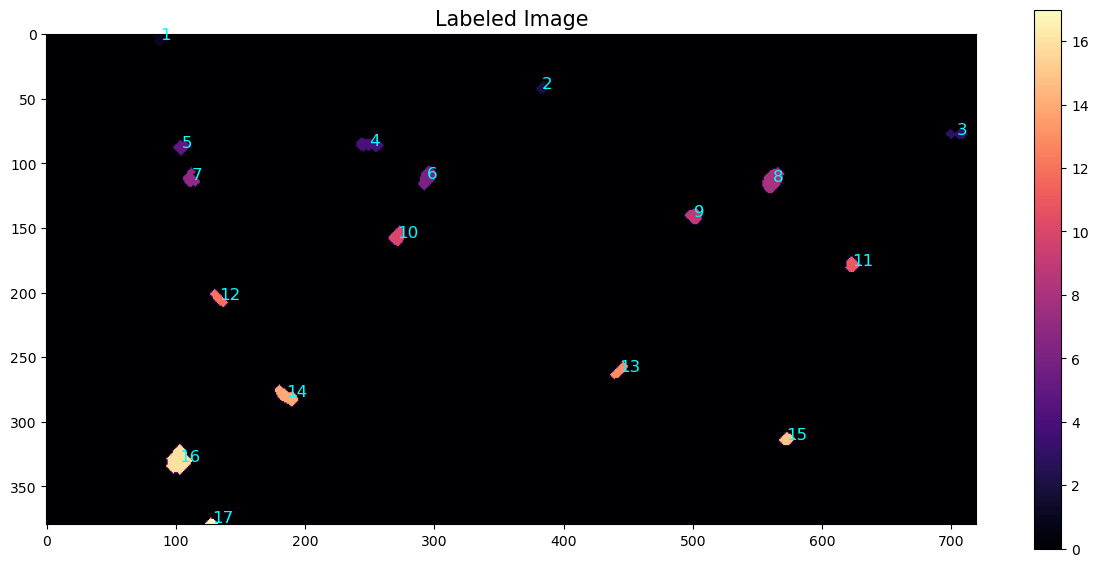

In [12]:
# Label the morphologically operated image
labeled_image = label(morph)

# Display the labeled image
plt.figure(figsize=(15, 7))
plt.imshow(labeled_image, cmap='magma')
plt.colorbar()
plt.title('Labeled Image', fontsize=15)

# Add numbers and affix them to the centroid of each object
for region in regionprops(labeled_image):
    y, x = region.centroid
    plt.text(x, y, region.label, color='cyan', fontsize=12)

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/watermelon_labeled.png', dpi = 300, bbox_inches='tight')
plt.show()

In [13]:
 # Display the properties of the labeled image as a dataframe
df = pd.DataFrame(regionprops_table(labeled_image, properties=['perimeter','area','eccentricity','bbox']))
df.index = np.arange(1, len(df)+1)

# Export as csv
df.to_csv('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/watermelon.csv')
df.style.set_table_attributes("style='display:inline'").set_caption('Blob Features')

,perimeter,area,eccentricity,bbox-0,bbox-1,bbox-2,bbox-3
1,36.041631,83,0.624440,0,81,10,94
2,25.798990,57,0.565007,37,379,47,388
3,43.941125,95,0.890748,73,696,82,713
4,53.941125,164,0.890600,81,240,92,261
5,35.941125,92,0.554330,83,98,95,112
6,47.941125,164,0.799812,103,288,122,302
7,43.355339,115,0.619457,104,106,119,119
8,55.355339,224,0.763952,104,554,124,571
9,36.627417,111,0.471884,136,494,148,507
10,40.284271,123,0.684766,149,265,165,277


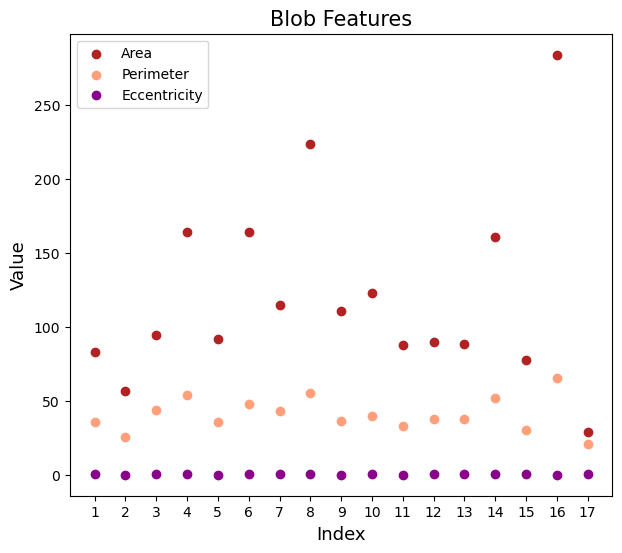

In [14]:
# Construct a scatter plot for the properties we extracted from the blobs
plt.figure(figsize=(7,6))
# Scatter plot for area
plt.scatter(df.index, df['area'], color='firebrick', label='Area')
# Scatter plot for perimeter
plt.scatter(df.index, df['perimeter'], color = 'lightsalmon', label='Perimeter')
# Scatter plot for eccentricity
plt.scatter(df.index, df['eccentricity'], color = 'darkmagenta', label='Eccentricity')
plt.title('Blob Features', fontsize=15)
plt.xlabel('Index', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.xticks(np.arange(1,18,1))
plt.legend()

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/watermelon_feature_scatter.png', dpi = 300, bbox_inches='tight')
plt.show()

## **Seashells with varying eccentricities**

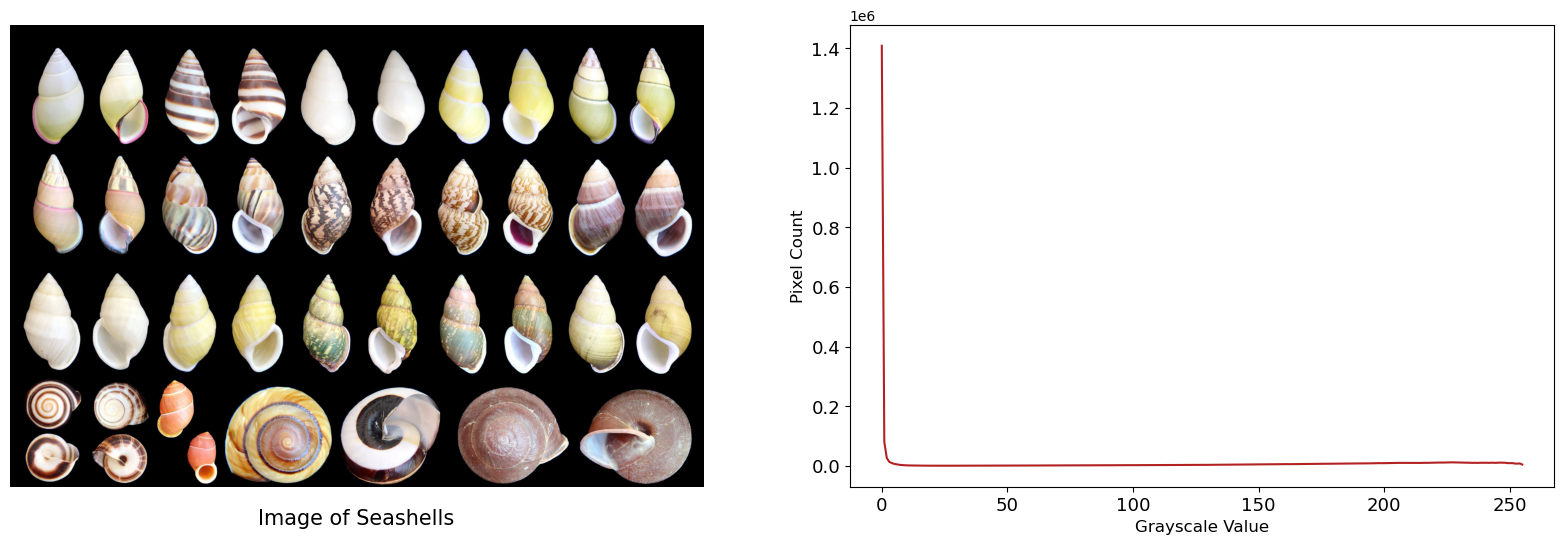

In [15]:
# Define function that converts rgb image to grayscale
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
# Load in the image
img = Image.open('/Users/Amogus/Downloads/seashell.jpg')
img_arr = np.array(img)
img_arr_gray = rgb2gray(img_arr)
# Convert to grayscale
img_gray = img.convert('L')

# Grayscale values array
vals = np.arange(0,256,1)
# Solve for the histogram of the grayscale image
hist = img_gray.histogram()

# Juxtapose the image with its histogram
plt.figure(figsize=(20,6))
# First subplot for image
plt.subplot(121)
plt.axis('off')
plt.title('Image of Seashells', y=-0.10, fontsize=15)
plt.imshow(img)
# Second subplot for histogram
plt.subplot(122)
plt.plot(vals, hist, color='firebrick')
plt.xlabel('Grayscale Value', fontsize=12)
plt.ylabel('Pixel Count', fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/seashell_gs_hist.png', dpi = 300, bbox_inches='tight')
plt.show()

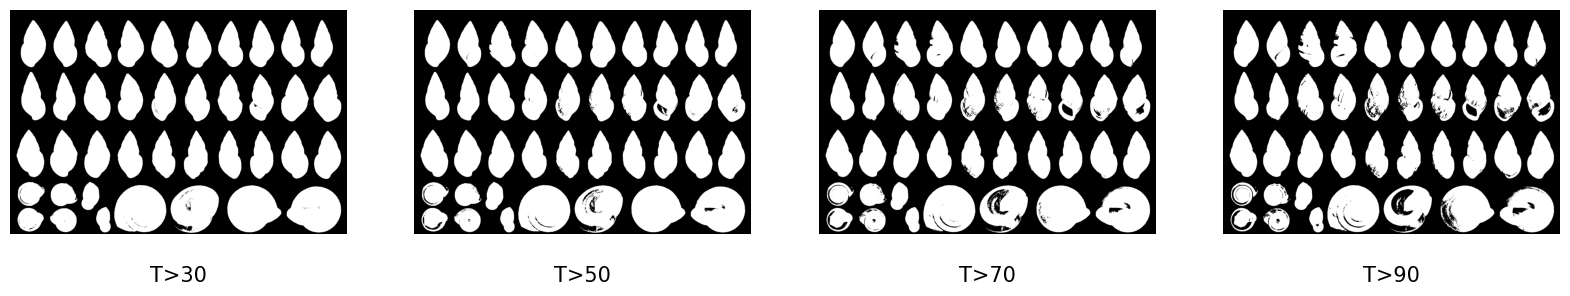

In [16]:
# Perform image thresholding
I1 = img_arr_gray>30
I2 = img_arr_gray>50
I3 = img_arr_gray>70
I4 = img_arr_gray>90
# Plot parameters
plt.figure(figsize=(20,6))
plt.subplot(141)
plt.axis('off')
plt.title('T>30', y=-0.25, fontsize=15)
plt.imshow(I1, cmap='gray')
plt.subplot(142)
plt.axis('off')
plt.title('T>50', y=-0.25, fontsize=15)
plt.imshow(I2, cmap='gray')
plt.subplot(143)
plt.axis('off')
plt.title('T>70', y=-0.25, fontsize=15)
plt.imshow(I3, cmap='gray')
plt.subplot(144)
plt.axis('off')
plt.title('T>90', y=-0.25, fontsize=15)
plt.imshow(I4, cmap='gray')

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/seashell_thresholding.png', dpi = 300, bbox_inches='tight')
plt.show()

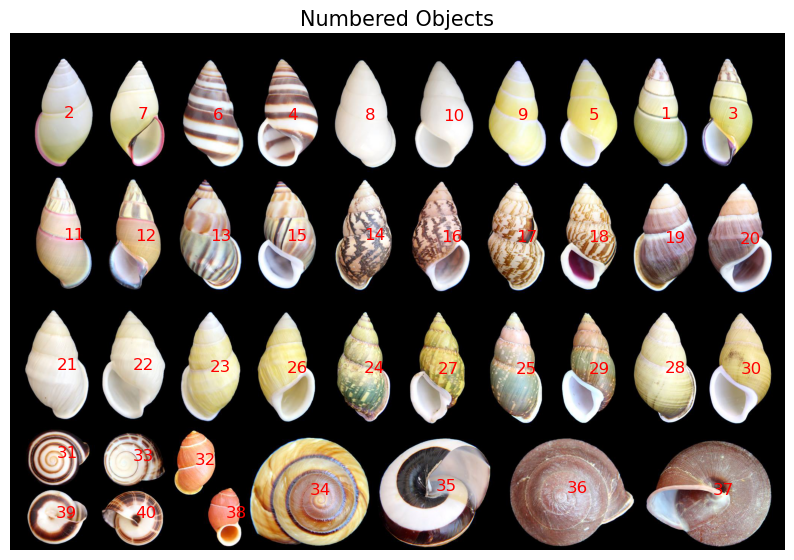

In [17]:
# Create structuring element
element = np.array([[0,0,0,1,0,0,0],
                    [0,0,1,1,1,0,0],
                    [0,1,1,1,1,1,0],
                    [1,1,1,1,1,1,1],
                    [0,1,1,1,1,1,0],
                    [0,0,1,1,1,0,0],
                    [0,0,0,1,0,0,0]])

# Perform morphological operations on the thresholded image
# Closing followed by opening
morph = opening(closing(I1, element), element)
# Label the image
labeled_image = label(morph)
# Plot the original image with the numbered objects
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Numbered Objects', fontsize=15)

# Add numbers and affix them to the centroid of each object
for region in regionprops(labeled_image):
    y, x = region.centroid
    plt.text(x, y, region.label, color='red', fontsize=12)
    
plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/seashell_numbered.png', dpi = 300, bbox_inches='tight')
plt.show()

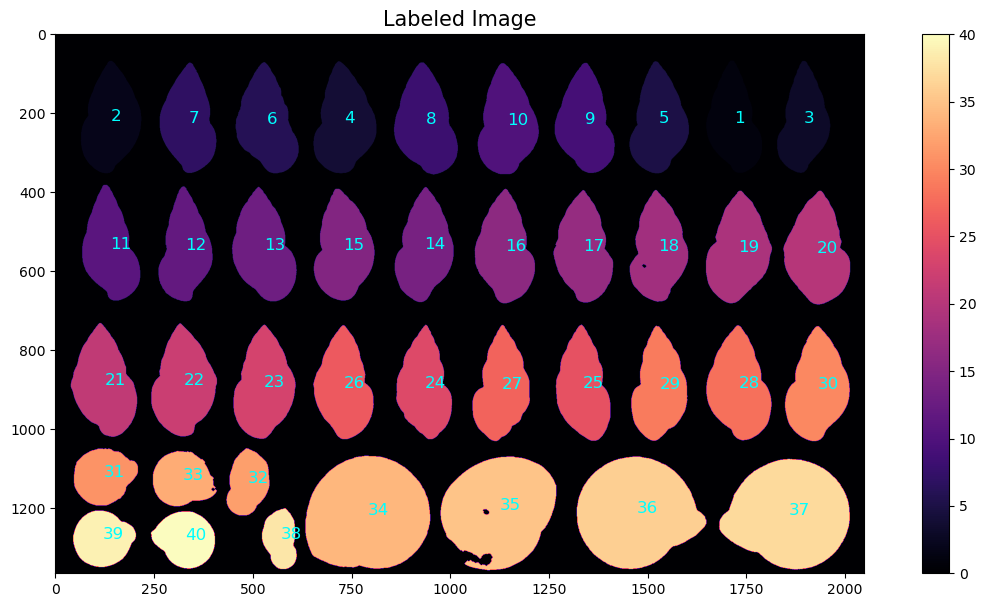

In [18]:
# Label the morphologically operated image
labeled_image = label(morph)

# Display the labeled image
plt.figure(figsize=(15, 7))
plt.imshow(labeled_image, cmap='magma')
plt.colorbar()
plt.title('Labeled Image', fontsize=15)

# Add numbers and affix them to the centroid of each object
for region in regionprops(labeled_image):
    y, x = region.centroid
    plt.text(x, y, region.label, color='cyan', fontsize=12)

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/seashell_labeled.png', dpi = 300, bbox_inches='tight')
plt.show()

In [19]:
 # Display the properties of the labeled image as a dataframe
df = pd.DataFrame(regionprops_table(labeled_image, properties=['perimeter','area','eccentricity','bbox']))
df.index = np.arange(1, len(df)+1)

# Export as csv
df.to_csv('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/seashell.csv')
df.style.set_table_attributes("style='display:inline'").set_caption('Blob Features')

,perimeter,area,eccentricity,bbox-0,bbox-1,bbox-2,bbox-3
1,709.310750,25553,0.887987,67,1648,352,1790
2,719.494516,29213,0.850935,68,65,353,219
3,698.825469,23992,0.898217,68,1828,352,1963
4,733.151370,29909,0.840850,69,654,353,814
5,720.523953,27758,0.864317,69,1454,353,1605
6,725.595021,28399,0.857405,71,457,353,617
7,700.867099,26664,0.864875,72,265,352,409
8,733.009235,30087,0.847930,72,858,356,1020
9,711.695526,27518,0.860704,73,1265,352,1417
10,723.695526,29125,0.849673,74,1070,355,1225


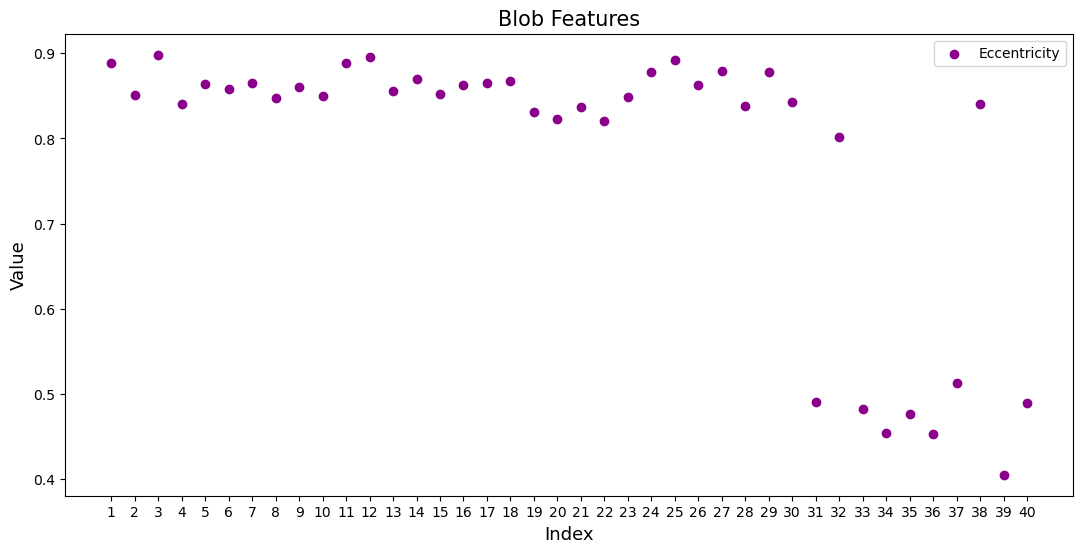

In [20]:
# Construct a scatter plot for the properties we extracted from the blobs
plt.figure(figsize=(13,6))
# Scatter plot for eccentricity
plt.scatter(df.index, df['eccentricity'], color = 'darkmagenta', label='Eccentricity')
plt.title('Blob Features', fontsize=15)
plt.xlabel('Index', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.xticks(np.arange(1,41,1))
plt.legend()

plt.savefig('/Users/Amogus/Desktop/2nd Semester (2022-2023)/App Physics 157/ACT7/seashell_feature_scatter.png', dpi = 300, bbox_inches='tight')
plt.show()